In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt 
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
import src.tracks as tracks
import src.spec as spec
import src.plot as plot

In [3]:
tr = tracks.read_bhac()

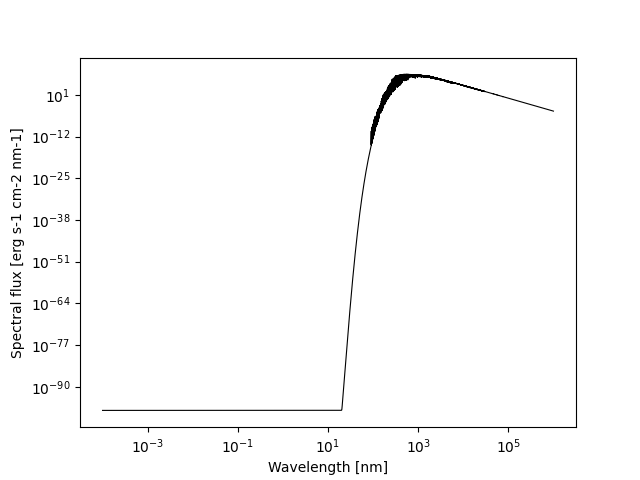

In [4]:
out = tracks.get_params_bhac(tr, 1.0, 1.0e7, ["Teff","logg"])
wl, fl = spec.get_spec(out[0], out[1])

%matplotlib widget
plt.close("all")
plot.plot_spectrum(wl,fl)

In [6]:
itp = spec.create_interp()

68
7
100
meshgrid...
(7, 68, 100)
(7, 68, 100)
(7, 68, 100)
interpolate...
done


In [9]:
v,x,y,z = itp[0],itp[1],itp[2],itp[3]
sh = np.shape(v)

1200.0 2.5


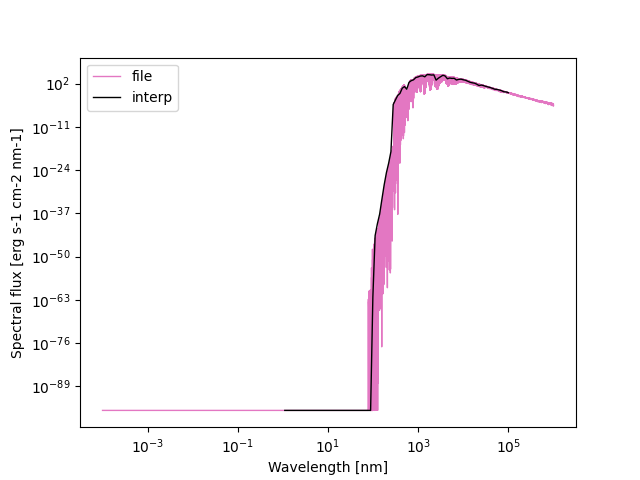

In [10]:
fig,ax = plt.subplots(1,1)

i = 0
j = 0
print(x[i,j,0],y[i,j,0])

wl, fl = spec.get_spec(x[i,j,0], y[i,j,0])
ax.plot(wl,fl,label="file", lw=1, color='tab:pink')

ax.plot(z[i,j,:],v[i,j,:],label="interp",lw=1, color='k')


ax.set(xscale="log",yscale="log", xlabel="Wavelength [nm]", ylabel="Spectral flux [erg s-1 cm-2 nm-1]")
ax.legend()
plt.show()

4 37 5.030659431989404
4 38 3.3647326105220436
4 42 2.4917361619167555
4 50 2.5307730980008007
4 50 0.8836503226412128
4 50 0.6720961771372994
4 50 0.6171735341907048
4 50 0.6650247576072658
4 50 0.8297666669031103
4 50 0.8730149988931907
4 51 0.8583164547969346
4 51 0.7569859353463373
4 51 0.5890662217085763
4 51 0.3434864957455265
4 51 0.09958727130788748
4 51 0.5881677621460631
4 52 1.0373674638200268
4 52 1.8487952281591595
4 53 3.685961008833125
4 53 5.423411517241094


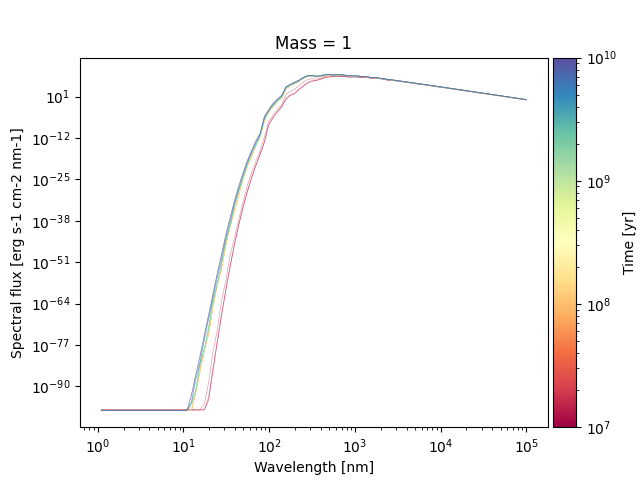

In [24]:
fig,ax = plt.subplots(1,1)

tarr = np.logspace(7,10,20)

mass = 1.0

cmap= plt.cm.Spectral
norm = mpl.colors.LogNorm(vmin=tarr[0], vmax=tarr[-1]) 
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)    
sm.set_array([])  

for time in tarr:

    out = tracks.get_params_bhac(tr, mass, time, ["Teff","logg"])
    
    w,f = spec.get_spec_from_interp((v,x,y,z),out[0],out[1])
    ax.plot(w,f, color=cmap(norm(time)), alpha=0.5, lw=0.5)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(sm, cax=cax, orientation='vertical', label='Time [yr]')  

ax.set(xscale="log", yscale="log")
ax.set(xlabel="Wavelength [nm]", ylabel="Spectral flux [erg s-1 cm-2 nm-1]")
ax.set_title("Mass = %g"%mass)

plt.show()